**Bike Sharining Assessment**

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.

1.   How well those variables describe the bike demands
2.   Which variables are significant in predicting the demand for shared bikes.





Step 1: Reading and Understanding the Data

In [7]:
# import the requried library's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
bike_df=pd.read_csv('/content/day.csv')
bike_df.head()


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [9]:
bike_df.shape

(730, 16)

In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [12]:
# converting dteday into correct data formate
bike_df['dteday']=bike_df['dteday'].astype('datetime64[ns]')
bike_df['dteday']=pd.to_datetime(bike_df['dteday'])

In [13]:
bike_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [14]:
bike_df.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        6           0   
1        2 2018-02-01       1   0     1        0        0           0   
2        3 2018-03-01       1   0     1        0        1           1   
3        4 2018-04-01       1   0     1        0        2           1   
4        5 2018-05-01       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [15]:
# Missing Value and OutLiner check
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
# Drop the dteday column
bike_df.drop('dteday',axis=1,inplace=True)

In [17]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

Visualising the Data

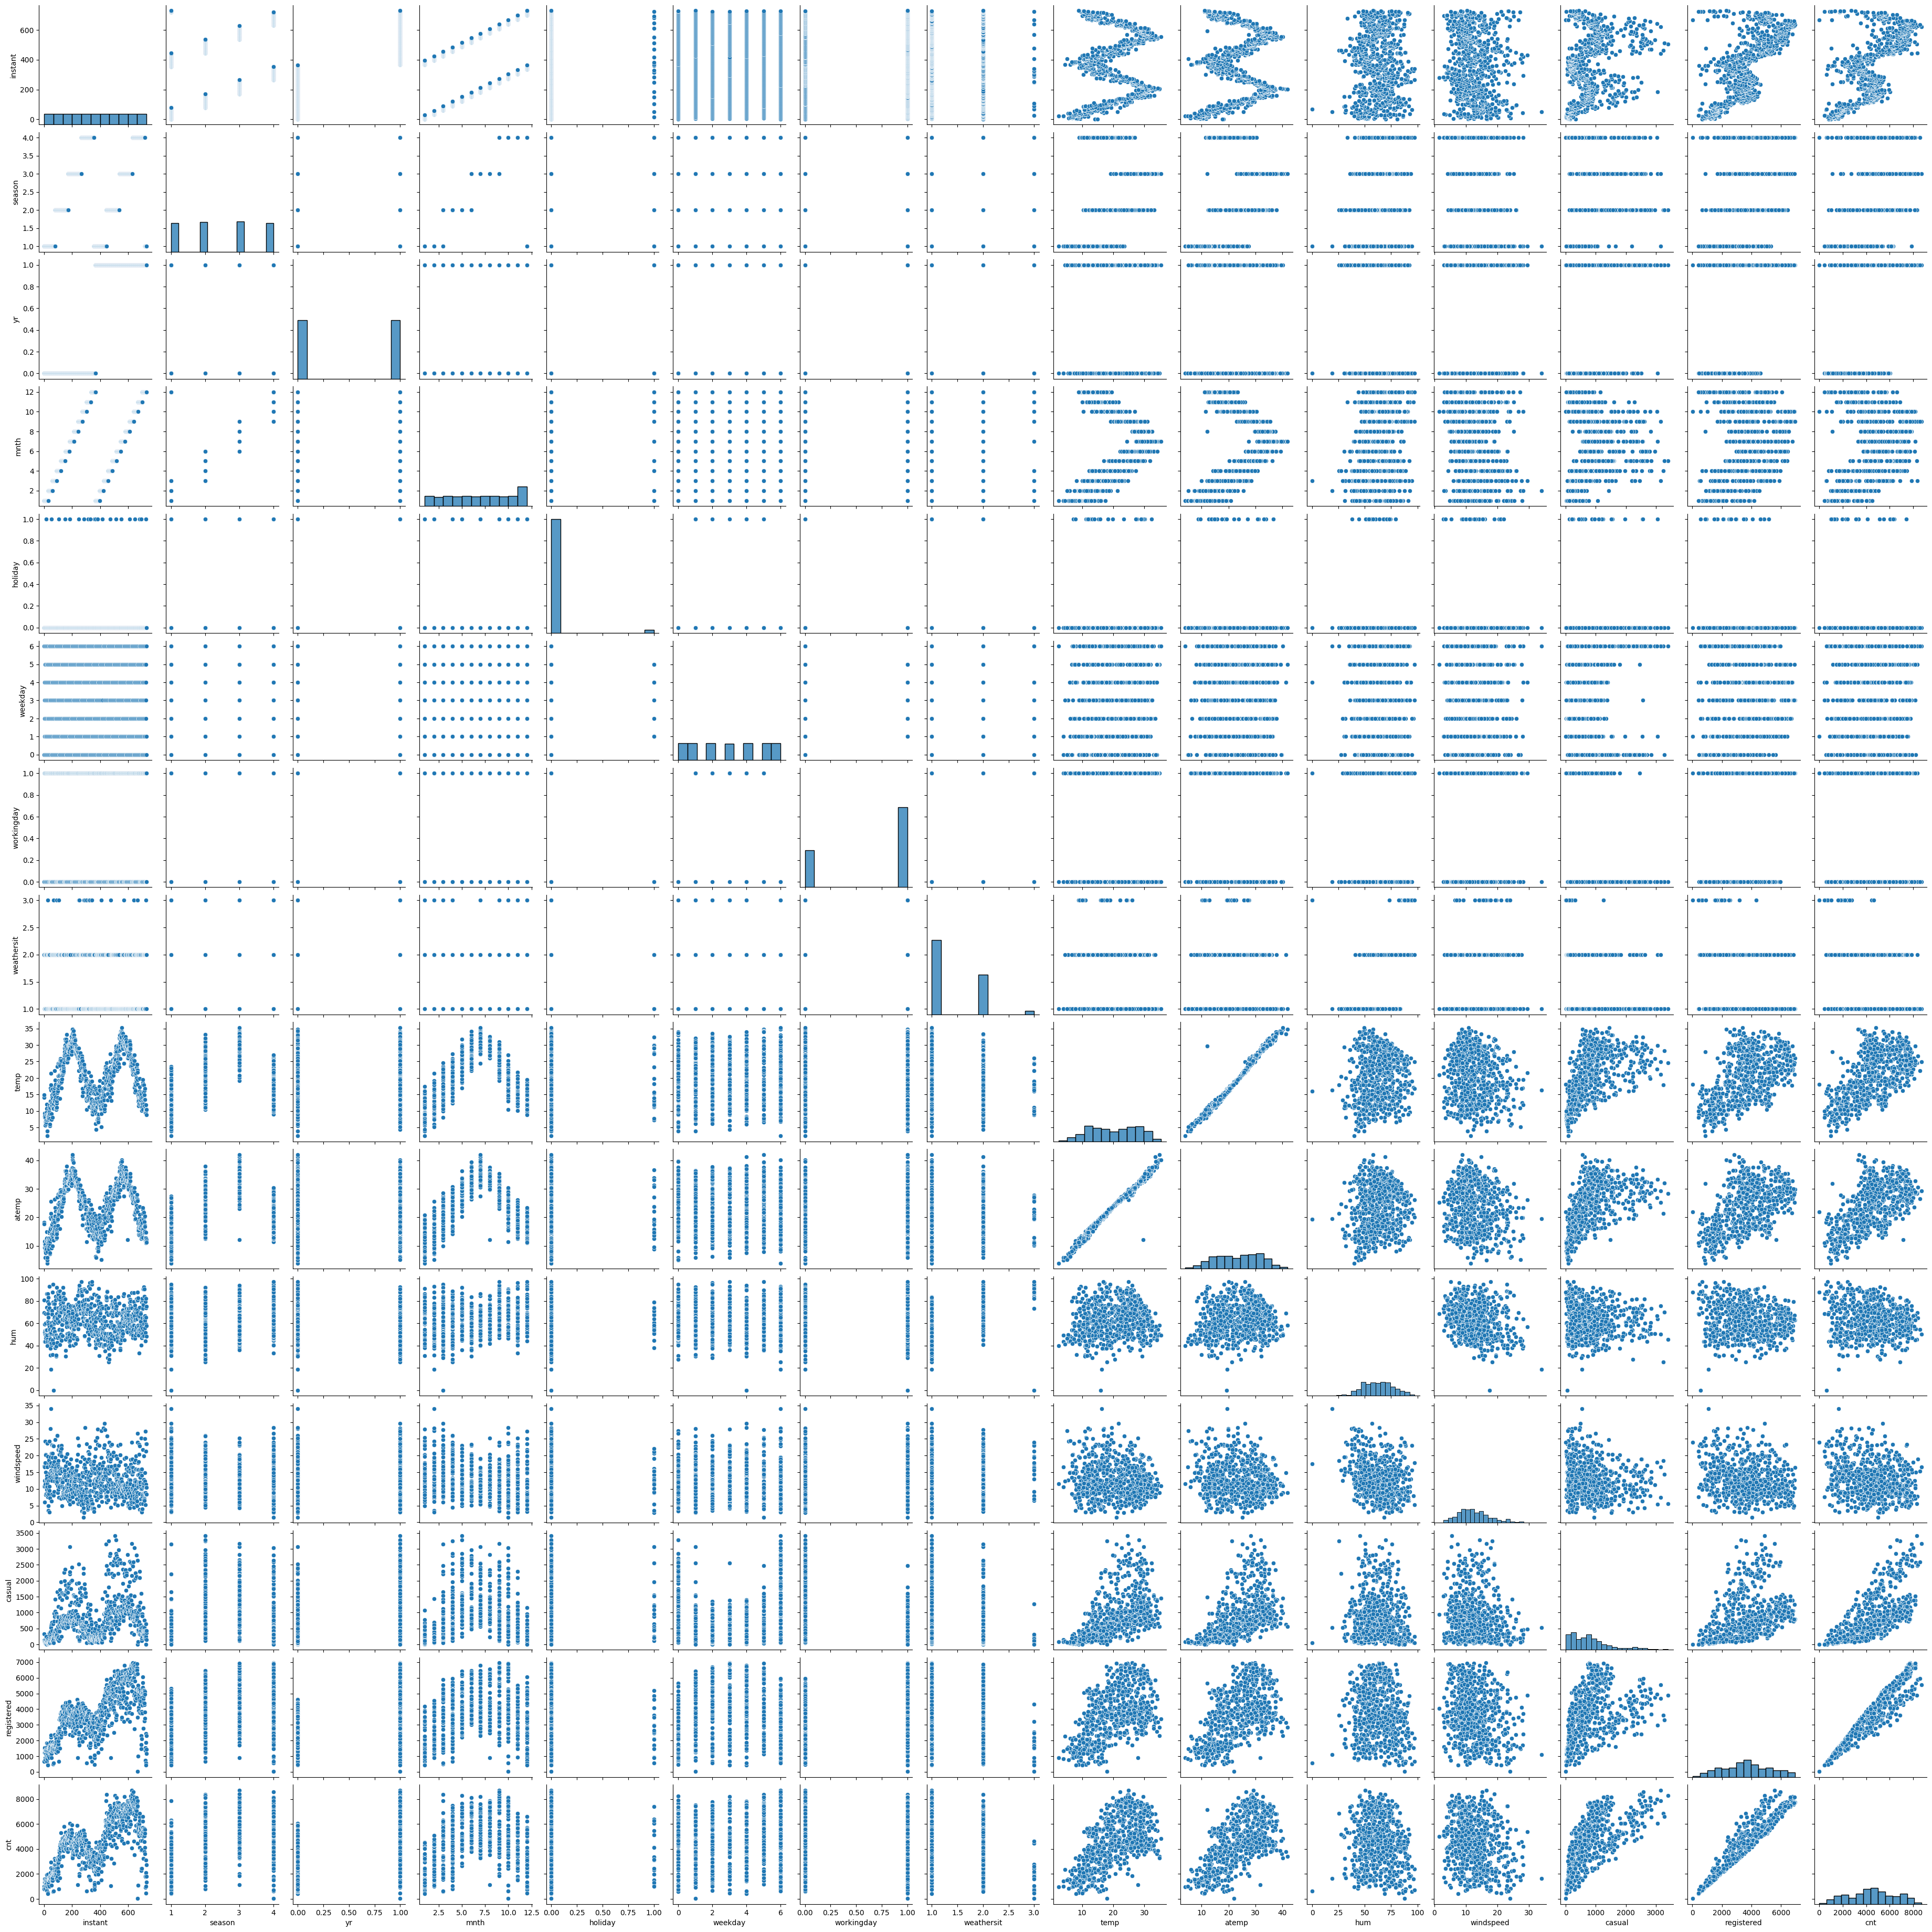

In [18]:
# pairplot on data
sns.pairplot(bike_df)
plt.show()


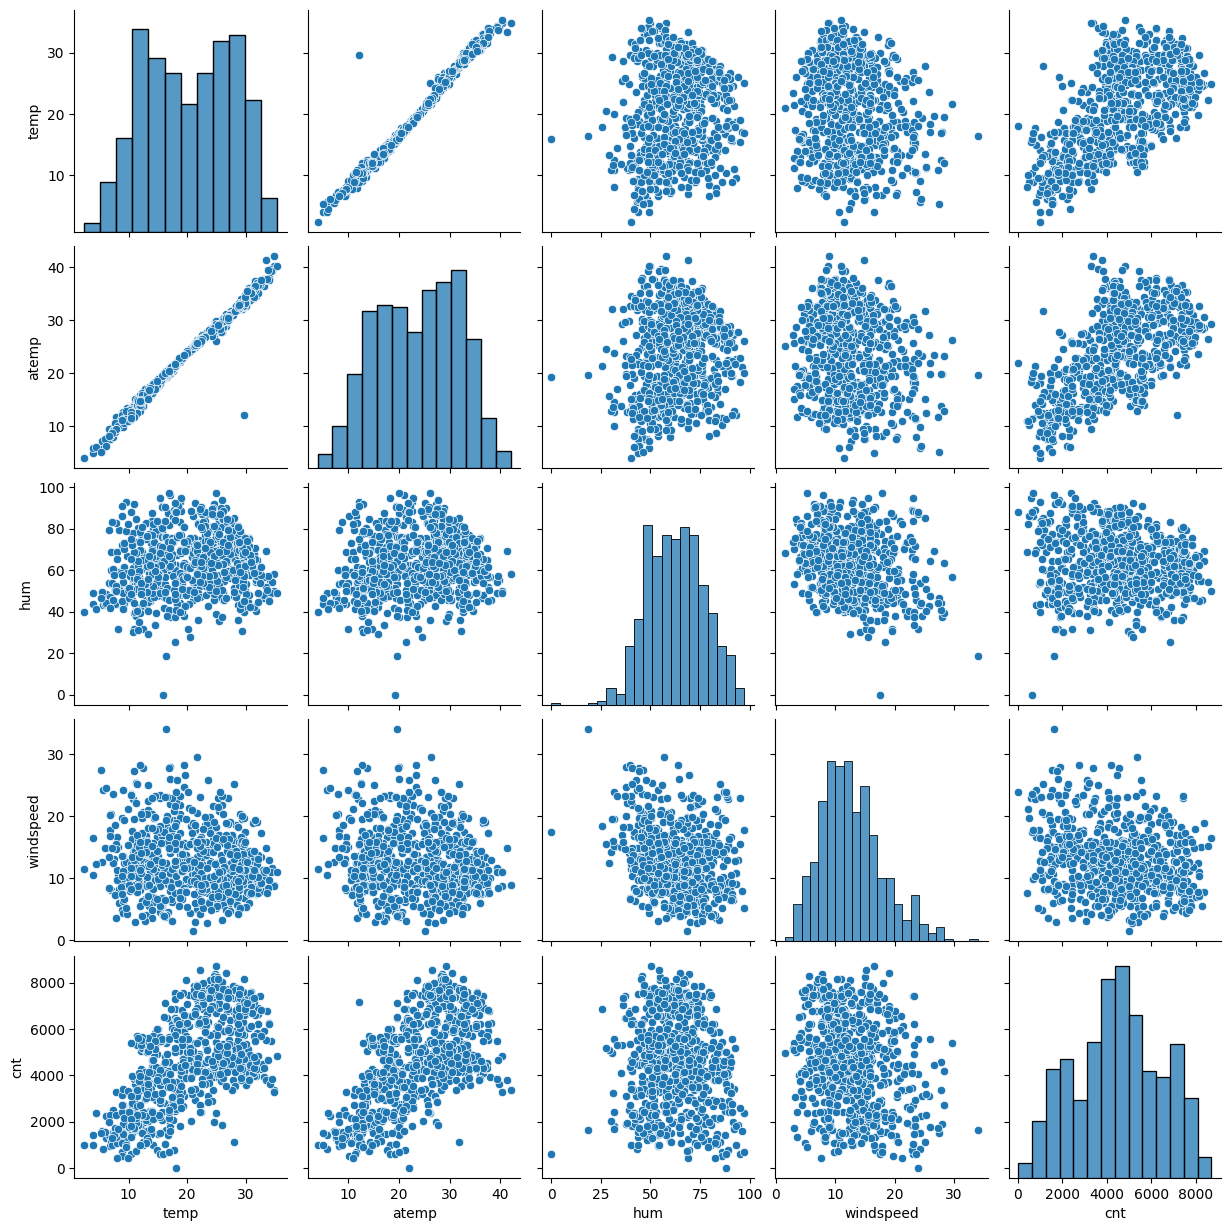

In [19]:
# pair plot for numerical values
sns.pairplot(bike_df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

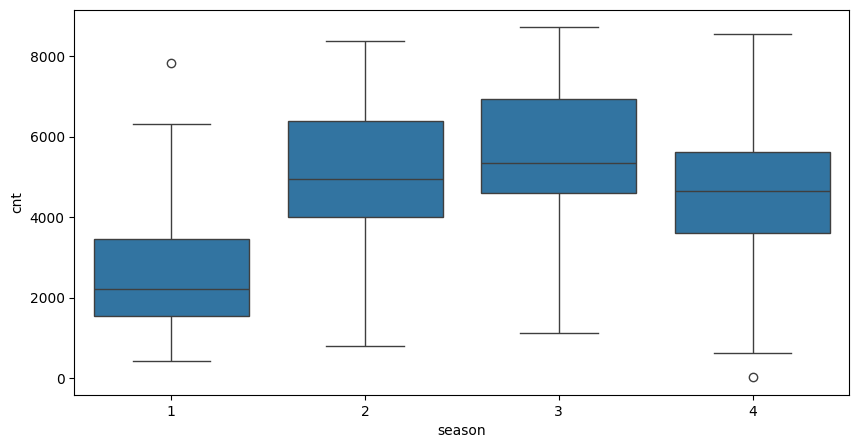

In [20]:
# Box plot
plt.figure(figsize = (10, 5))
sns.boxplot(x ='season', y = 'cnt', data = bike_df)
plt.show()

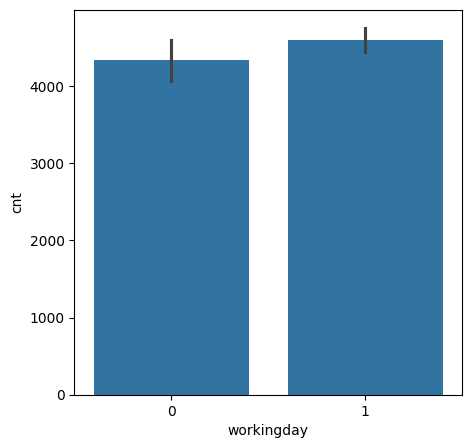

In [21]:
# Bargraph on workday
plt.figure(figsize = (5, 5))
sns.barplot(x ='workingday', y = 'cnt', data = bike_df)
plt.show()

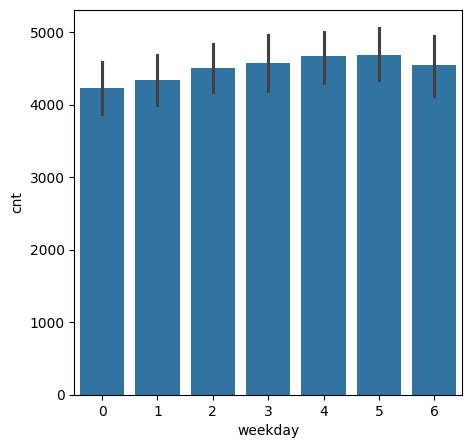

In [22]:
# Bargaph on weekday
plt.figure(figsize = (5, 5))
sns.barplot(x ='weekday', y = 'cnt', data = bike_df)
plt.show()

In [23]:
# drop the instant column
bike_df.drop('instant',axis=1,inplace=True)

In [24]:
# drop the registered column
bike_df.drop('registered',axis=1,inplace=True)

In [25]:
# drop the casual column
bike_df.drop('casual',axis=1,inplace=True)

In [ ]:
# Data Preparation for modeling
varlist=['weekday']
bike_df[varlist]=bike_df[varlist].apply(lambda x: x.map({'sunday':0,'monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}))

bike_df[varlist].head()
bike_df.head()

Spliting the Data into Training and Test Data sets

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
df_train.shape

(510, 12)

In [28]:
df_test.shape

(219, 12)

Rescaling the Features by using Min-Max Method

In [33]:
# To instantiate an object
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 0's and 1's columns

# created a list of numeric variables
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

season  yr      mnth  holiday   weekday  workingday  weathersit  \
653  1.000000   1  0.818182        0  0.333333           1         0.0   
576  0.666667   1  0.545455        0  0.333333           1         0.0   
426  0.000000   1  0.181818        0  1.000000           0         0.5   
728  0.000000   1  1.000000        0  0.000000           0         0.0   
482  0.333333   1  0.272727        0  1.000000           0         0.5   

         temp     atemp       hum  windspeed       cnt  
653  0.509887  0.501133  0.575354   0.300794  0.864243  
576  0.815169  0.766351  0.725633   0.264686  0.827658  
426  0.442393  0.438975  0.640189   0.255342  0.465255  
728  0.245101  0.200348  0.498067   0.663106  0.204096  
482  0.395666  0.391735  0.504508   0.188475  0.482973

In [36]:
df_train.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.505882    0.507843    0.504456    0.025490    0.498366    0.676471   
std      0.370649    0.500429    0.315338    0.157763    0.336182    0.468282   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.333333    0.000000    0.181818    0.000000    0.166667    0.000000   
50%      0.666667    1.000000    0.545455    0.000000    0.500000    1.000000   
75%      0.666667    1.000000    0.818182    0.000000    0.833333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed         cnt  
count   510.00000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean      0.20098    0.537262    0.512989    0.650369    0.320768    0.513620  
std       0.27377    0.225844    0.212385    0.145882    0.169797    0.224593  
min       0.00000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%       0.00000    0.339853    0.332086    0.538643    0.199179    0.356420  
50%       0.00000    0.540519    0.526811    0.653714    0.296763    0.518638  
75%       0.50000    0.735215    0.688457    0.754830    0.414447    0.684710  
max       1.00000    1.000000    1.000000    1.000000    1.000000    1.000000

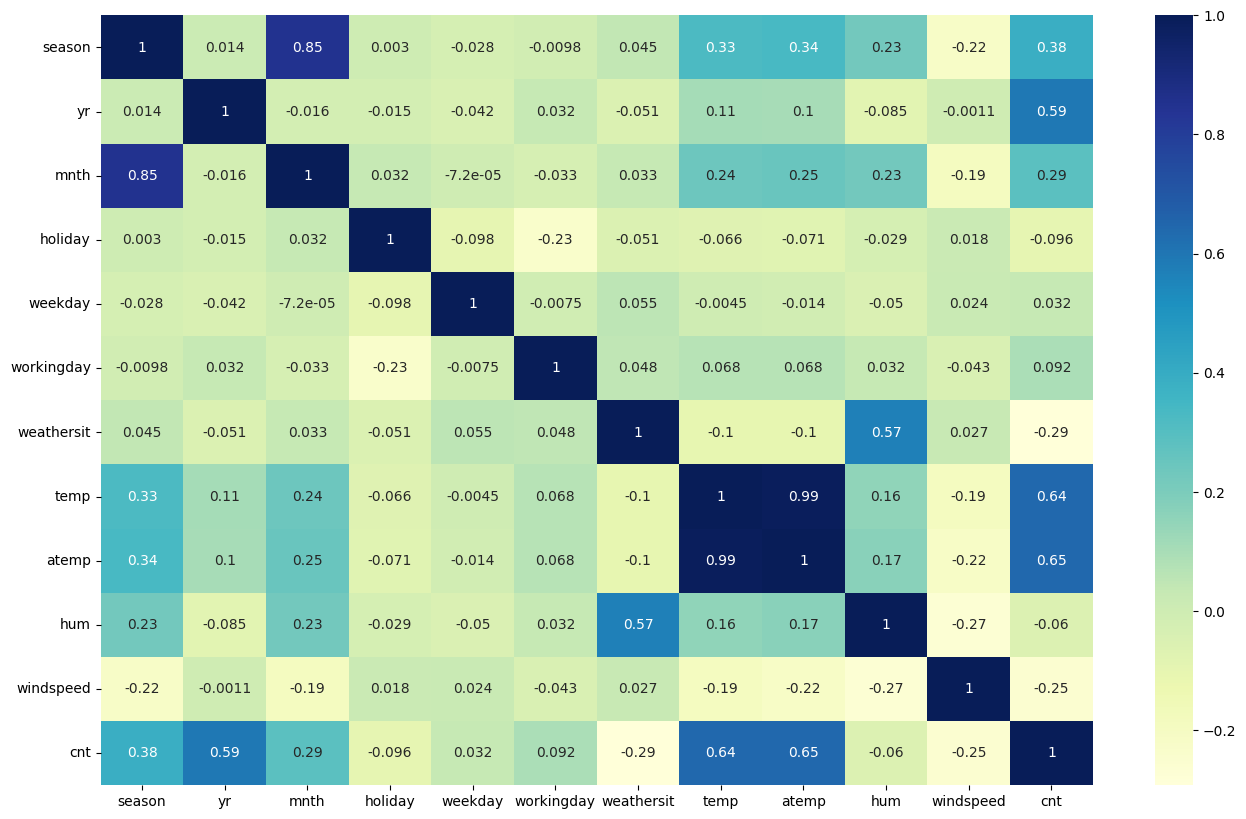

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

By above heatmap with cnt atemp is most corrleted.

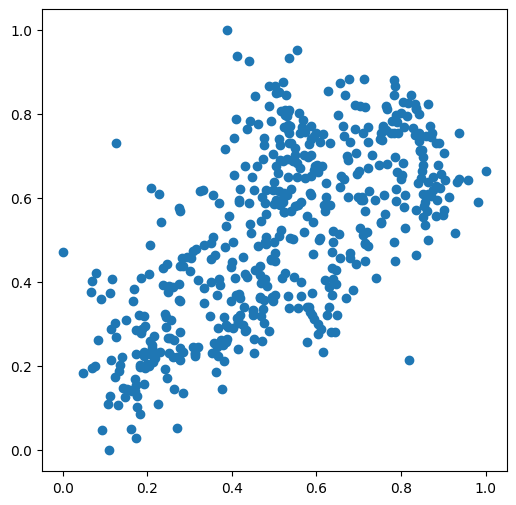

In [38]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.show()

Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

**Building a linear model**

Fit a regression line through the training data using **statsmodels.** Remember that in statsmodels, you need to explicitly fit a constant using **sm.add_constant**(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [40]:
# Build the Liner model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()


In [41]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          4.96e-169
Time:                        03:09:20   Log-Likelihood:                 455.82
No. Observations:                 510   AIC:                            -887.6
Df Residuals:                     498   BIC:                            -836.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1809      0.032      5.659      0.0

Checking the VIF

In [42]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8        atemp  346.98
7         temp  333.20
9          hum   16.09
2         mnth   13.32
0       season   11.30
10   windspeed    3.74
5   workingday    3.14
4      weekday    3.03
6   weathersit    2.19
1           yr    2.01
3      holiday    1.09

Dropping the Variable and Updating the model

In [44]:
# dropping the highly correlated variable
X = X_train.drop(columns='atemp')

In [45]:
# build 2nd model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.84e-169
Time:                        03:09:20   Log-Likelihood:                 454.07
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     499   BIC:                            -839.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1858      0.032      5.820      0.0

In [47]:
 # checking the 2nd VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8         hum  15.29
2        mnth  13.32
0      season  11.30
7        temp   7.95
9   windspeed   3.66
5  workingday   3.14
4     weekday   3.03
6  weathersit   2.17
1          yr   2.01
3     holiday   1.09

In [48]:
# drop the mnth column
X = X_train.drop(columns='mnth')

In [49]:
# build 3rd model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          4.15e-170
Time:                        03:09:20   Log-Likelihood:                 455.60
No. Observations:                 510   AIC:                            -889.2
Df Residuals:                     499   BIC:                            -842.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1796      0.032      5.633      0.0

In [51]:
 # checking the 2nd VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
7       atemp  346.98
6        temp  333.14
8         hum   15.15
9   windspeed    3.73
0      season    3.40
4  workingday    3.14
3     weekday    3.01
5  weathersit    2.16
1          yr    2.01
2     holiday    1.09

In [52]:
# Drop the temp column
X = X_train.drop(columns='temp')

In [53]:
# Build the 4th model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     205.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.13e-169
Time:                        03:09:20   Log-Likelihood:                 454.57
No. Observations:                 510   AIC:                            -887.1
Df Residuals:                     499   BIC:                            -840.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1781      0.032      5.573      0.0

In [55]:
 # checking the 2nd VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8         hum  15.76
2        mnth  13.32
0      season  11.30
7       atemp   8.28
9   windspeed   3.65
5  workingday   3.14
4     weekday   3.02
6  weathersit   2.19
1          yr   2.01
3     holiday   1.09

**Residual Analysis of the train**

In [56]:
y_train_cnt = lr_4.predict(X_train_lm)

<ipython-input-57-0ef60fec9164>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

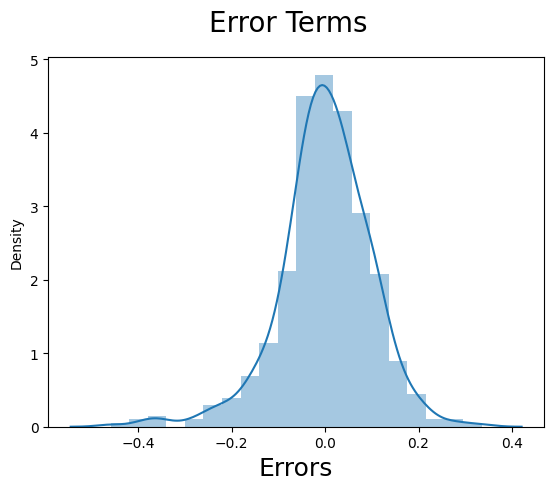

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Predictions and Evalution on Test set**

In [58]:
# create the list of numeric values
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp','atemp','hum','windspeed','cnt']

#Transform the data
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

season  yr      mnth  holiday   weekday  workingday  weathersit  \
184  0.666667   0  0.545455        1  0.166667           0         0.5   
535  0.333333   1  0.454545        0  0.500000           1         0.0   
299  1.000000   0  0.818182        0  0.666667           1         0.5   
221  0.666667   0  0.636364        0  0.500000           1         0.0   
152  0.333333   0  0.454545        0  0.666667           1         0.0   

         temp     atemp       hum  windspeed       cnt  
184  0.831783  0.769660  0.657364   0.084219  0.692706  
535  0.901354  0.842587  0.610133   0.153728  0.712034  
299  0.511964  0.496145  0.837699   0.334206  0.303382  
221  0.881625  0.795343  0.437098   0.339570  0.547400  
152  0.817246  0.741471  0.314298   0.537414  0.569029

In [59]:
# add casual and registered columns
df_test['casual'] = 0
df_test['registered'] = 0

In [60]:
df_test.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.485540    0.479452    0.497717    0.036530    0.503044    0.698630   
std      0.369821    0.500722    0.311080    0.188034    0.331402    0.459904   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.272727    0.000000    0.166667    0.000000   
50%      0.333333    0.000000    0.454545    0.000000    0.500000    1.000000   
75%      0.666667    1.000000    0.727273    0.000000    0.833333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed         cnt  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.187215    0.558941    0.532991    0.638508    0.313350    0.520592   
std      0.269422    0.233698    0.217888    0.148974    0.159947    0.218435   
min      0.000000    0.046591    0.025950    0.261915   -0.042808    0.048205   
25%      0.000000    0.354650    0.344751    0.527265    0.198517    0.377531   
50%      0.000000    0.558691    0.549198    0.627737    0.299459    0.524275   
75%      0.500000    0.759096    0.714132    0.743928    0.403048    0.672745   
max      1.000000    0.984424    0.980934    1.002146    0.807474    0.963300   

       casual  registered  
count   219.0       219.0  
mean      0.0         0.0  
std       0.0         0.0  
min       0.0         0.0  
25%       0.0         0.0  
50%       0.0         0.0  
75%       0.0         0.0  
max       0.0         0.0

Dividing into Y_test and X_test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# add constants
X_test_m4 = sm.add_constant(X_test)
X_test_m4.head()

const    season  yr      mnth  holiday   weekday  workingday  weathersit  \
184    1.0  0.666667   0  0.545455        1  0.166667           0         0.5   
535    1.0  0.333333   1  0.454545        0  0.500000           1         0.0   
299    1.0  1.000000   0  0.818182        0  0.666667           1         0.5   
221    1.0  0.666667   0  0.636364        0  0.500000           1         0.0   
152    1.0  0.333333   0  0.454545        0  0.666667           1         0.0   

         temp     atemp       hum  windspeed  casual  registered  
184  0.831783  0.769660  0.657364   0.084219       0           0  
535  0.901354  0.842587  0.610133   0.153728       0           0  
299  0.511964  0.496145  0.837699   0.334206       0           0  
221  0.881625  0.795343  0.437098   0.339570       0           0  
152  0.817246  0.741471  0.314298   0.537414       0           0

In [63]:
# droppping the variable which are dropped in train model
X_test_m4 = X_test_m4.drop(columns='atemp')
X_test_m4 = X_test_m4.drop(columns='mnth')
X_test_m4 = X_test_m4.drop(columns='temp')

In [64]:
 # Predict the test data
 y_test_pred= lr_4.predict(X_test_m4)


In [78]:
# Evaluate the r2 value
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)


0.789345


 we can impove the model by
1. By adding new features
2. By Creating Non-Linear Model.



In [66]:
# version os sofware used
import sklearn
print(sklearn.__version__)


1.6.1


In [67]:
# version
import statsmodels
print(statsmodels.__version__)

0.14.4


In [68]:
 #version
 import scipy
print(scipy.__version__)

1.13.1


In [69]:
# version
import numpy
print(numpy.__version__)

1.26.4


In [70]:
 # version
 import pandas
print(pandas.__version__)

2.2.2


In [71]:
# version
import matplotlib
print(matplotlib.__version__)

3.10.0


In [72]:
 # version
 import seaborn
print(seaborn.__version__)

0.13.2


In [73]:
#version
import plotly
print(plotly.__version__)

5.24.1


In [74]:
#version
import seaborn
print(seaborn.__version__)

0.13.2


In [75]:
# version python
import matplotlib
print(matplotlib.__version__)

3.10.0


In [76]:
# pandas version
import pandas
print(pandas.__version__)

2.2.2


In [77]:
#numpy version
import numpy
print(numpy.__version__)

1.26.4
